In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Bai tap 1
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


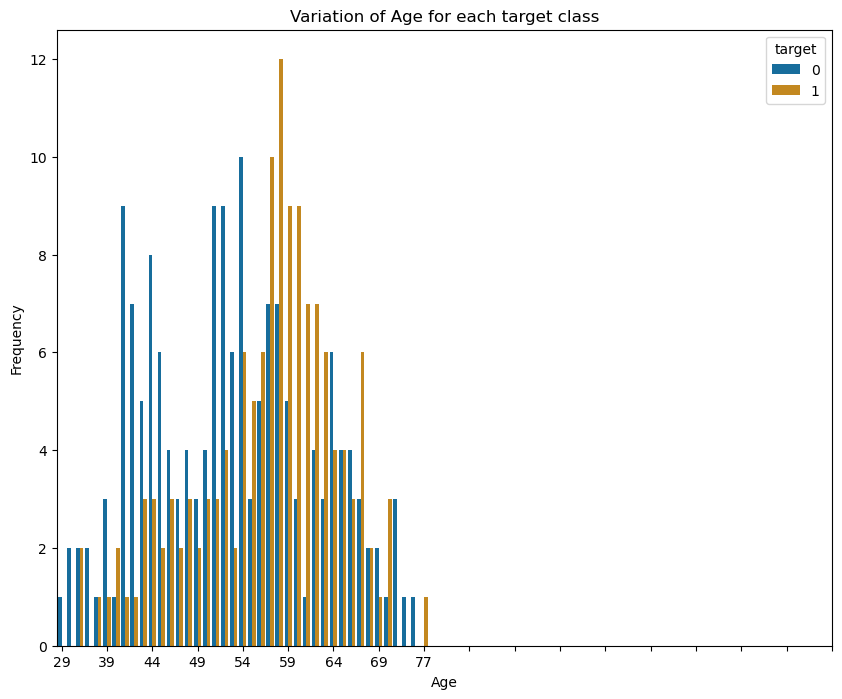

In [57]:
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# distribution of target vs age
plt.figure(figsize=(10, 8))
sns.countplot(x='age', hue='target', data=df, palette='colorblind')
plt.title('Variation of Age for each target class')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 90, 5))
plt.show()

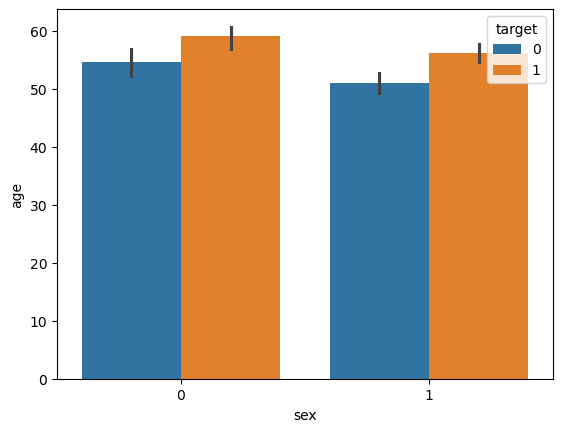

In [63]:
# Bài tập 2
# Hiển thị mối quan hệ giữa độ tuổi, giới tính và khả năng bị bệnh tim.

sns.barplot(data=df, x=df['sex'], y=df['age'], hue=df['target'])
plt.show()

In [86]:
# Bài tập 3
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)


cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test), 2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))



Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


In [99]:
# Bài tập 4
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))

Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


In [103]:
# Bài tập 5

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_train_pred = nb_model.predict(X_train)
y_train_test = nb_model.predict(X_test)
                            
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_train_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_train))
print('Accuracy for test set for Naive Bayes = {}'.format(accuracy_for_test))

Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


In [140]:
# Bài tập 6

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
dt_model.fit(X_train, y_train)

y_train_pred = dt_model.predict(X_train)
y_train_test = dt_model.predict(X_test)
                            
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_train_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Decision Tree = {}'.format(accuracy_for_train))
print('Accuracy for test set for Decision Tree = {}'.format(accuracy_for_test))

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


In [143]:
# Bài tập 7

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_train_test = rf_model.predict(X_test)
                            
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_train_test)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))

Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


In [155]:
# Bài tập 8

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
ada_model.fit(X_train, y_train)

y_train_pred = ada_model.predict(X_train)
y_test_pred = ada_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))

Accuracy for training set for Random Forest = 0.91
Accuracy for test set for Random Forest = 0.84


d:\Apps\MiniConda\envs\aio\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [156]:
# Bài tập 9

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gd_model = GradientBoostingClassifier(
    learning_rate=0.1, 
    n_estimators=100, 
    subsample=1.0, 
    min_samples_split=2, 
    max_depth=3, 
    random_state=42
)
gd_model.fit(X_train, y_train)

y_train_pred = gd_model.predict(X_train)
y_test_pred = gd_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))

Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 0.85


In [ ]:
# Bài tập 9

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import XG

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gd_model = GradientBoostingClassifier(
    learning_rate=0.1, 
    n_estimators=100, 
    subsample=1.0, 
    min_samples_split=2, 
    max_depth=3, 
    random_state=42
)
gd_model.fit(X_train, y_train)

y_train_pred = gd_model.predict(X_train)
y_test_pred = gd_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))

In [159]:
# Bài tập 10

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(
    objective='binary:logistic',
    n_estimators=100, 
    random_state=42
)
xgb_model.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))


Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 0.87


In [176]:
# Bài tập 11

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier()
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)


estimators = [
    ('dtc', dtc),
    ('rfc', rfc),
    ('knn', knn),
    ('xgb', xgb),
    ('gc', gc),
    ('svc', svc),
    ('ad', ad)
]

clf = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier())
clf.fit(X_train, y_train)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Random Forest = {}'.format(accuracy_for_train))
print('Accuracy for test set for Random Forest = {}'.format(accuracy_for_test))

d:\Apps\MiniConda\envs\aio\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\MiniConda\envs\aio\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\MiniConda\envs\aio\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\MiniConda\envs\aio\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\A

Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 0.87


d:\Apps\MiniConda\envs\aio\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [177]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Giả sử df đã được định nghĩa
# X và y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Chia tập dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Định nghĩa các mô hình cơ bản
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', probability=True, random_state=42)  # SVC cần probability=True để dùng trong Stacking
ad = AdaBoostClassifier(random_state=42)

# Định nghĩa mô hình Stacking với XGBClassifier là final_estimator
estimators = [
    ('dt', dtc),
    ('rf', rfc),
    ('knn', knn),
    ('gb', gc),
    ('svc', svc),
    ('ad', ad)
]

# Sử dụng XGBClassifier làm final_estimator
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier(random_state=42))

# Huấn luyện mô hình Stacking
stacking_clf.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm thử
y_train_pred = stacking_clf.predict(X_train)
y_test_pred = stacking_clf.predict(X_test)

# Tính toán ma trận nhầm lẫn
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Tính độ chính xác
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# In kết quả
print('Độ chính xác trên tập huấn luyện với Stacking = {}'.format(accuracy_for_train))
print('Độ chính xác trên tập kiểm tra với Stacking = {}'.format(accuracy_for_test))


d:\Apps\MiniConda\envs\aio\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\MiniConda\envs\aio\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\MiniConda\envs\aio\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Apps\MiniConda\envs\aio\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\A

Độ chính xác trên tập huấn luyện với Stacking = 0.95
Độ chính xác trên tập kiểm tra với Stacking = 0.87
